# 패키지 임포트

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import platform

# OS별 폰트 설정
os_name = platform.system()
if os_name == 'Windows':
    plt.rc('font', family='MalgunGothic')
elif os_name == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
else:  # Linux 등
    plt.rc('font', family='NanumGothic')

plt.rc('axes', unicode_minus=False)

# 데이터 불러오기

| 열 이름                              | 한국어 설명                                                                                                           |
| -----------------------| ---------------------------------------------------------------------|
| **RowNumber**          | 행 번호 (데이터셋에서 각 행의 고유 번호)                                                         |
| **CustomerId**           | 고객 ID (고객을 구분하기 위한 고유 식별자)                                                     |
| **Surname**                 | 성 (고객의 성씨)                                                                                                    |
| **CreditScore**           | 신용 점수 (신용 평가 점수로, 일반적으로 높을수록 신용도가 좋음을 의미) |
| **Geography**              | 지역 (France, Spain, Germany)                                                                       |
| **Gender**                     | 성별 (남성: Male, 여성: Female)                                                                       |
| **Age**                            | 나이 (고객의 나이)                                                                                                |
| **Tenure**                      | 거래 기간 (해당 은행에서 거래한 연수)                                                             |
| **Balance**                    | 계좌 잔고 (고객 계좌의 현재 잔액)                                                                      |
| **NumOfProducts**   | 이용 중인 금융상품 수 (고객이 은행에서 이용하고 있는 상품의 개수)          |
| **HasCrCard**             | 신용카드 보유 여부 (1: 있음, 0: 없음)                                                                 |
| **IsActiveMember**  | 활성 고객 여부 (1: 활동 중인 고객, 0: 비활성 고객)                                          |
| **EstimatedSalary**  | 추정 연봉 (고객의 연간 소득 추정치 달러)                                                         |
| **Exited**                       | 이탈 여부 (1: 계좌 해지 고객, 0: 계좌 유지 고객)                                               |

In [27]:
df = pd.read_csv('../data/Churn_Modelling.csv')
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [28]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
df.describe().style.background_gradient(cmap = "YlGnBu")

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [30]:
# 전체 개수
total = len(df)

# Geography 비율
geography_counts = df['Geography'].value_counts(normalize=True) * 100

# Gender 비율
gender_counts = df['Gender'].value_counts(normalize=True) * 100

# 출력
print("Geography 비율 (%):")
print(geography_counts)

print("\nGender 비율 (%):")
print(gender_counts)

Geography 비율 (%):
Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64

Gender 비율 (%):
Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64


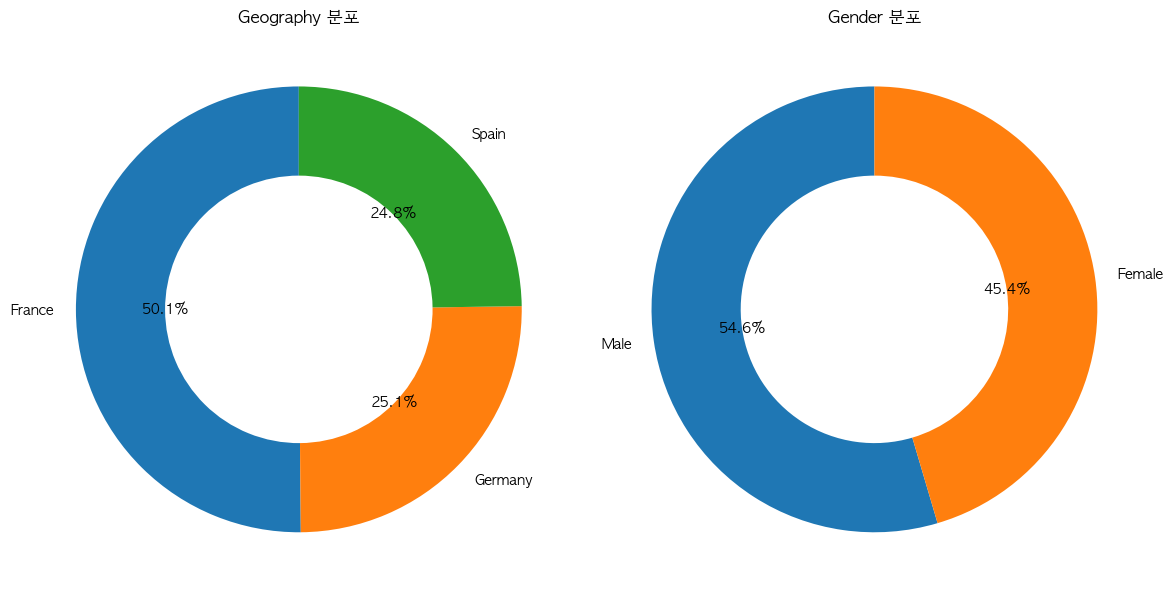

In [31]:
# 가상의 비율 데이터 (실제 데이터로 교체 가능)
geography_labels = ['France', 'Germany', 'Spain']
geography_sizes = [50.14, 25.09, 24.77]

gender_labels = ['Male', 'Female']
gender_sizes = [54.57, 45.43]

# 시각화: 도넛 형태 파이 차트
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Geography 도넛 차트
axs[0].pie(geography_sizes, labels=geography_labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
axs[0].set_title('Geography 분포')

# Gender 도넛 차트
axs[1].pie(gender_sizes, labels=gender_labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
axs[1].set_title('Gender 분포')

plt.tight_layout()
plt.show()

## 지역별 이탈고객 비율

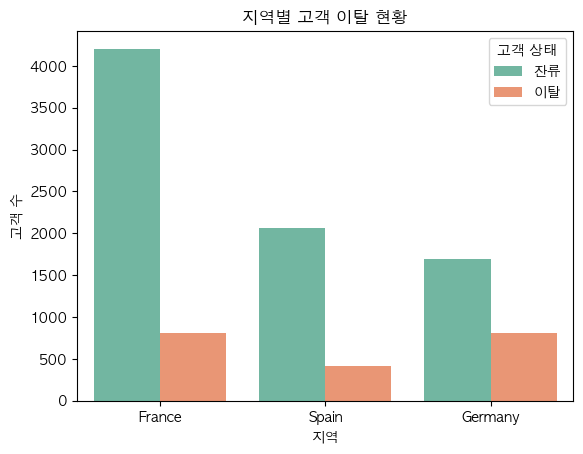

In [32]:
# 시각화
sns.countplot(data=df, x='Geography', hue='Exited', palette='Set2')

# 범례 수정
plt.legend(title='고객 상태', labels=['잔류', '이탈'])

plt.title('지역별 고객 이탈 현황')
plt.xlabel('지역')
plt.ylabel('고객 수')
plt.show()


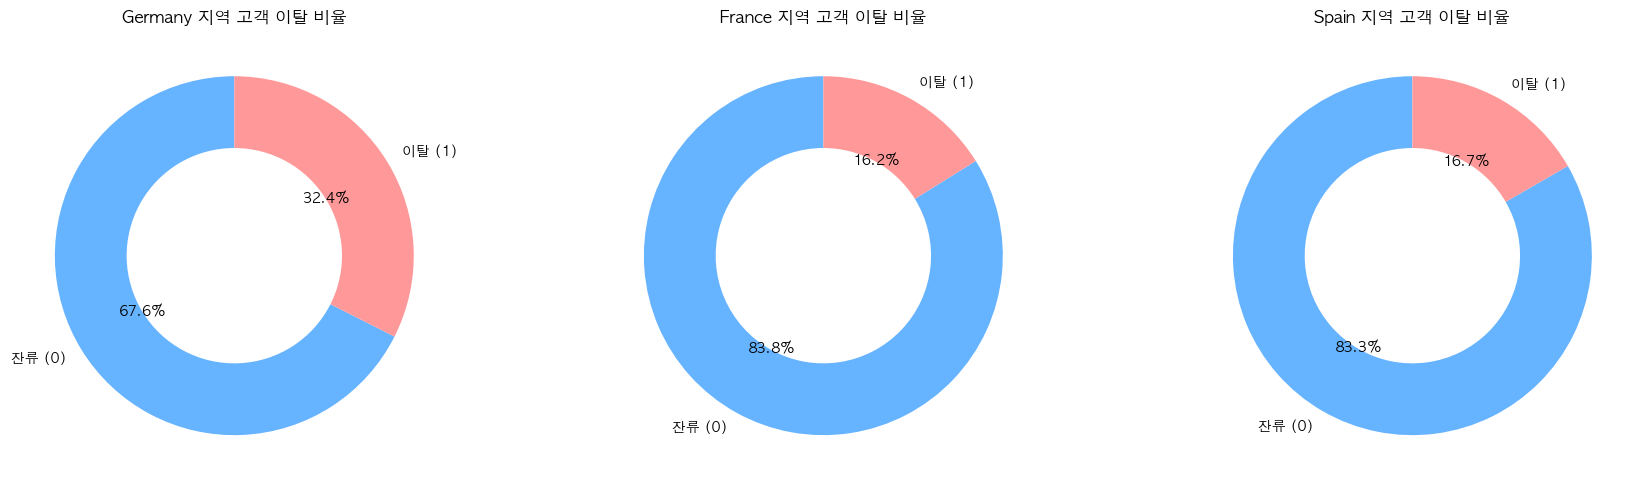

In [33]:
geos = ['Germany', 'France', 'Spain']
colors = ['#66b3ff', '#ff9999']  # 0=잔류(파랑), 1=이탈(빨강)

plt.figure(figsize=(18, 5))

for i, geo in enumerate(geos):
    plt.subplot(1, 3, i+1)

    # 해당 지역의 Exited 값 비율 계산
    geo_counts = df[df['Geography'] == geo]['Exited'].value_counts(normalize=True).sort_index()
    labels = ['잔류 (0)', '이탈 (1)']

    plt.pie(
        geo_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'width': 0.4}  # 도넛 모양
    )

    plt.title(f'{geo} 지역 고객 이탈 비율')

plt.tight_layout()
plt.show()


## 변수간 피어슨 상관계수

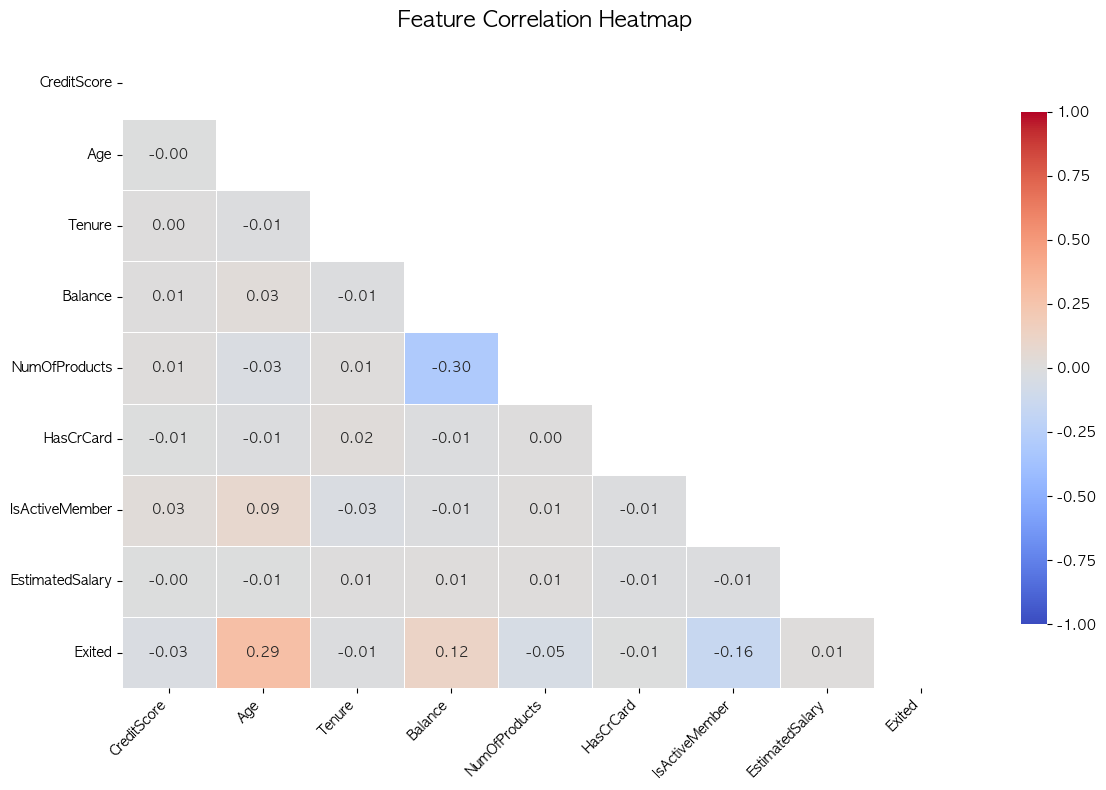

In [34]:
# 상관 행렬 계산
corr = df.corr(numeric_only=True)

# 마스킹: 대칭 부분 가림
mask = np.triu(np.ones_like(corr, dtype=bool))

# 플롯 설정
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",  # 소수점 둘째자리
    cmap="coolwarm",  # 색상 팔레트
    vmin=-1, vmax=1,  # 상관계수 범위 고정
    linewidths=0.5,  # 셀 사이 라인
    cbar_kws={"shrink": 0.8},  # 컬러바 크기
    annot_kws={"size": 10}  # 숫자 폰트 크기
)

plt.title("Feature Correlation Heatmap", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


## 신용 점수 분포 vs 이탈 여부

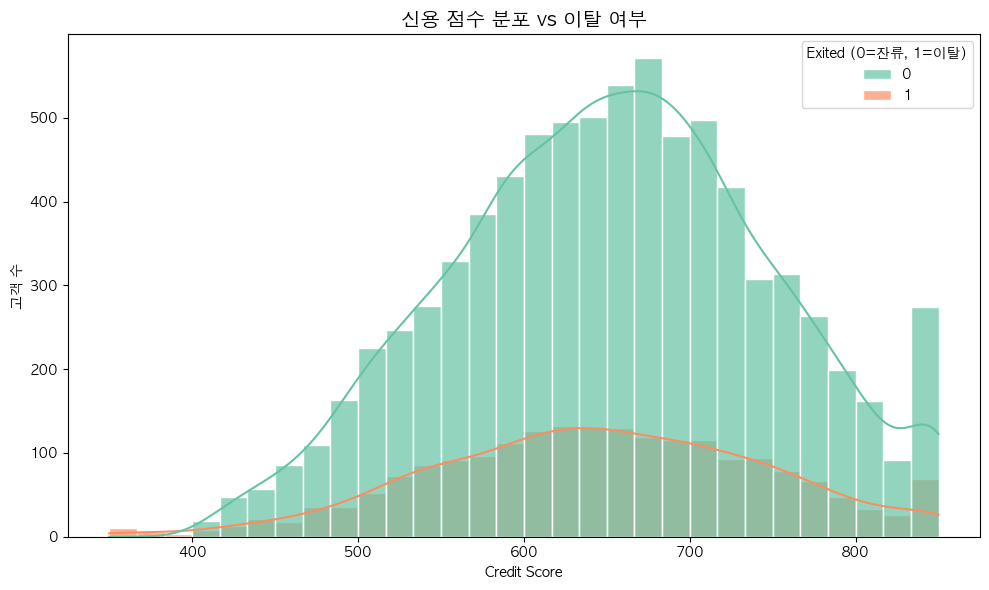

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x='CreditScore',
    hue='Exited',
    kde=True,
    palette='Set2',
    bins=30,
    edgecolor='white',
    alpha=0.7
)
plt.title('신용 점수 분포 vs 이탈 여부', fontsize=14)
plt.xlabel('Credit Score')
plt.ylabel('고객 수')

# 자동 생성된 범례 객체에 접근해 제목만 추가
legend = plt.gca().get_legend()
legend.set_title('Exited (0=잔류, 1=이탈)')

plt.tight_layout()
plt.show()

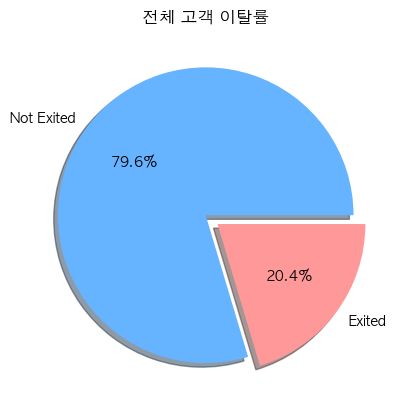

In [36]:
data = df['Exited'].value_counts()
data = dict(data)
labels = ["Not Exited", "Exited"]
colors = ['#66b3ff', '#ff9999']  # 0=잔류(파랑), 1=이탈(빨강)

plt.pie(
    data.values(),
    labels=labels,
    autopct='%1.1f%%',
    explode=[0, 0.1],
    shadow=True,
    colors=colors  # ← 여기서 색상 지정
)
plt.title("전체 고객 이탈률")
plt.show()


# 인사이트

- `나이`는 `이탈률`과 큰 상관관계가 있다.
- `계좌잔고`와 `이탈률`은 아주 작은 상관관계가 있다.
- `활성고객`과 `이탈률`은 아주 작은 상관관계가 있다.

- `계좌잔고`와 들고있는 `금융상품`에는 상관관계가 있다.

- `활성고객`과 `나이`는 아주 작은 상관관계가 있다.

전체 데이터 중 80%는 남았고 20% 떠났다.
스페인이나 프랑스는 이탈률이 16%인데 독일에서 32%로 유독 높다.